In [1]:
import netCDF4 as nc
import numpy as np

#fft_path = '/home/jim/Desktop/FFT_notebook/BPMFwFFT/examples/fft_sampling/t4_benzene'
fft_path = '/home/jim/Desktop/FFT_notebook/5.fft_sampling/1AVZ_B:C'
fft_sample_nc = '%s/fft_sample.nc'%fft_path

variable_names = nc.Dataset(fft_sample_nc, 'r').variables
rec_positions = nc.Dataset(fft_sample_nc, 'r').variables["rec_positions"][:]
lig_positions = nc.Dataset(fft_sample_nc, 'r').variables["lig_positions"][:]
lig_com = nc.Dataset(fft_sample_nc, 'r').variables["lig_com"][:]
volume = nc.Dataset(fft_sample_nc, 'r').variables["volume"][:]
nr_grid_points = nc.Dataset(fft_sample_nc, 'r').variables["nr_grid_points"][:]
exponential_sums = nc.Dataset(fft_sample_nc, 'r').variables["exponential_sums"][:]
log_of_divisors = nc.Dataset(fft_sample_nc, 'r').variables["log_of_divisors"][:]

mean_energy = nc.Dataset(fft_sample_nc, 'r').variables["mean_energy"][:]
min_energy = nc.Dataset(fft_sample_nc, 'r').variables["min_energy"][:]
resampled_energies = nc.Dataset(fft_sample_nc, 'r').variables["resampled_energies"][:]
resampled_trans_vectors = nc.Dataset(fft_sample_nc, 'r').variables["resampled_trans_vectors"][:]
print(resampled_trans_vectors[:])
print(resampled_energies[:])

#grid coordinates
origin = nc.Dataset(fft_sample_nc, 'r').variables["origin"][:]
x = nc.Dataset(fft_sample_nc, 'r').variables["x"][:]
y = nc.Dataset(fft_sample_nc, 'r').variables["y"][:]
z = nc.Dataset(fft_sample_nc, 'r').variables["z"][:]
d = nc.Dataset(fft_sample_nc, 'r').variables["d1"][:]
#print('native pose:', str(resampled_trans_vectors[0][0]))
#print('native pose:', resampled_energies[0][0])

#print('test', np.where(resampled_energies ==-1412.9091438865273))
#print('min energy pose:', resampled_trans_vectors[120][0])
#print('min energy pose:', resampled_energies[120][0])

for name in variable_names:
    print(name)

# for i, vec in enumerate(lig_com):
#     adj_vec = []
#     for x in vec:
#         adj_vec.append(x/0.5)
#     print('lig_com:%s'%i, vec, adj_vec)

# for i, vec in enumerate(resampled_trans_vectors[0]):
#     adj_vec = []
#     for x in vec:
#         adj_vec.append(x*0.5)
#     print('vec%s:'%i, str(adj_vec), str(vec))


print(lig_positions.shape)
print(resampled_energies.shape)
print(resampled_trans_vectors.shape)
print(np.amin(resampled_energies[0]))
min_index = np.where(resampled_energies[0] == resampled_energies[0].min())
print(min_index)
print(float(resampled_energies[0][min_index]))
print(resampled_trans_vectors[0][min_index])

[[[ 90  81  42]
  [ 91  80  42]
  [ 90  80  42]
  ...
  [119  29  18]
  [122  23  23]
  [135  24  19]]

 [[114  16  47]
  [113  17  47]
  [117  16  44]
  ...
  [108  19  43]
  [107  14  53]
  [107  16  48]]

 [[136  31  45]
  [136  33  44]
  [136  27  49]
  ...
  [145  31  45]
  [144  31  44]
  [140  24  46]]

 ...

 [[ 86  57  37]
  [ 85  57  38]
  [ 64  99  50]
  ...
  [ 80  59  42]
  [ 55 110  63]
  [ 80  67  44]]

 [[144  71  56]
  [145  70  52]
  [145  71  55]
  ...
  [ 84  59  52]
  [148  58  63]
  [ 84  55  54]]

 [[ 79  94  45]
  [ 84  93  45]
  [ 78  94  45]
  ...
  [ 77 103  46]
  [113  49  20]
  [ 81  82  41]]]
[[-277.37512553 -274.07292768 -272.25358838 ... -216.04959298
  -215.52760432 -215.07617798]
 [-261.7790264  -263.15391475 -260.56580996 ... -209.36867446
  -210.00094376 -208.00186068]
 [-249.81210449 -247.82477198 -248.43323348 ... -186.68916813
  -189.54929004 -188.50018543]
 ...
 [-240.96715745 -236.73096793 -233.66761296 ... -197.04024253
  -199.64730912 -200.802

['lj_sigma_scaling_factor', 'origin', 'd0', 'd1', 'd2', 'spacing', 'counts', 'x', 'y', 'z', 'LJa', 'electrostatic', 'occupancy', 'LJr', 'trans_crd']
[246 246 246]
4.42511968959854 4.436090157643713 4.44698288906925
New indices list : []
1839


In [2]:
from grids import RecGrid
from grids import LigGrid

rec_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C/receptor.prmtop"
lj_sigma_scal_fact = 0.8
rec_inpcrd = "/home/jim/Desktop/FFT_notebook/2.minimize/1AVZ_B:C/receptor.inpcrd"

bsite_file = None
grid_nc_file = "/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C/grid.nc"

lig_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C/ligand.prmtop"
lig_inpcrd = "/home/jim/Desktop/FFT_notebook/2.minimize/1AVZ_B:C/ligand.inpcrd"



def _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, grid_nc_file):
    rec_grid = RecGrid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, 
                        grid_nc_file, new_calculation=False)
    return rec_grid

def _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid):
    lig_grid = LigGrid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid)
    return lig_grid

rec_grid = _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rec_inpcrd, bsite_file, grid_nc_file)

lig_grid = _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lig_inpcrd, rec_grid)



    

setting lj_sigma_scaling_factor
[0.8]
/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C/grid.nc
setting x
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5

In [55]:
print(len(lig_grid.get_charges()['CHARGE_E_UNIT']))
#print(lig_grid.get_crd())
print(resampled_trans_vectors[0])
trans_lig_crd = []
for i, crd in enumerate(lig_grid.get_crd()):
    shifted_crds = []
    shifted_crds.append(crd[0]+(resampled_trans_vectors[0][0][0]*.5))
    shifted_crds.append(crd[1]+(resampled_trans_vectors[0][0][1]*.5))
    shifted_crds.append(crd[2]+(resampled_trans_vectors[0][0][2]*.5))
    trans_lig_crd.append(shifted_crds)

trans_lig_crd_array = np.array(trans_lig_crd)
print(trans_lig_crd[0])
print(lig_grid.get_crd()[0])
#print(rec_grid.direct_energy(trans_lig_crd_array, lig_grid.get_charges()))


889
[[ 90  81  42]
 [ 91  80  42]
 [ 90  80  42]
 ...
 [119  29  18]
 [122  23  23]
 [135  24  19]]
17.773997299999998
62.7739973
17.5864334
62.586433400000004
17.621986999999997
62.621987
18.7455149
63.7455149
16.8480111
61.8480111
17.1865184
62.1865184
16.8474067
61.8474067
17.880200799999997
62.8802008
16.1856217
61.1856217
15.124004
60.124004
16.2894953
61.2894953
16.675447899999998
61.675447899999995
16.1779637
61.1779637
16.1135335
61.1135335
15.485028699999999
60.4850287
15.0134362
60.0134362
14.933541499999999
59.9335415
15.390045699999998
60.3900457
14.221293999999999
59.221294
13.8099457
58.8099457
13.0008704
58.0008704
12.414639699999999
57.414639699999995
12.370115
57.370115
13.237804899999999
58.2378049
14.014899199999999
59.0148992
11.9505138
56.950513799999996
11.129461
56.129461
12.0764108
57.0764108
11.6995425
56.6995425
13.5966981
58.5966981
14.5685507
59.5685507
13.6610014
58.6610014
12.844023199999999
57.844023199999995
15.2517862
60.2517862
16.4459992
61.4459992
14

In [56]:
import IO

pdb_filename = '/home/jim/Desktop/FFT_notebook/ligand_test2.pdb'

lig_prmtop = "/home/jim/Desktop/FFT_notebook/1.amber/1AVZ_B:C/ligand.prmtop"



IO.write_pdb(lig_prmtop, lig_grid.get_crd(), pdb_filename, "w")

IO.write_pdb(lig_prmtop, trans_lig_crd_array, '/home/jim/Desktop/FFT_notebook/ligand_test2.pdb', "w")

In [78]:
rotation_nc = '/home/jim/Desktop/FFT_notebook/3.ligand_rand_rot/1AVZ_B:C/rotation.nc'

rotation_variables = nc.Dataset(rotation_nc, 'r').variables["positions"]

for i, rotation in enumerate(rotation_variables):
    IO.write_pdb(lig_prmtop, rotation_variables[i], '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/ligand_rotation%s.pdb'%i, "w")

print(rotation_variables.shape)
#IO.write_pdb(lig_prmtop, rotation_variables, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/ligand_rotation%s.pdb'%i, "w")

(2001, 889, 3)


In [103]:
# find the average translation vector between the origin centered structure and the initial translation
# this is mostly just a test, it's not needed for anything

native_translations = []

for i in range(0,889):
    native_translations.append([lig_grid.get_crd()[i][0]-rotation_variables[0][i][0], lig_grid.get_crd()[i][1]-rotation_variables[0][i][1], lig_grid.get_crd()[i][2]-rotation_variables[0][i][2]])
    #print(lig_grid.get_crd()[i][0]-rotation_variables[0][i][0], lig_grid.get_crd()[i][1]-rotation_variables[0][i][1], lig_grid.get_crd()[i][2]-rotation_variables[0][i][2])
native_trans_array = np.array(native_translations)

print(np.average(native_trans_array, axis=0))

[13.38627865 14.9664812  16.58221769]


In [ ]:
def _get_molecule_center_of_mass(self):
    """
    return the center of mass of self._crd
    """
    center_of_mass = np.zeros([3], dtype=float)
    masses = self._prmtop["MASS"]
    for atom_ind in range(len(self._crd)):
        center_of_mass += masses[atom_ind] * self._crd[atom_ind]
    total_mass = masses.sum()
    if total_mass == 0:
        raise RuntimeError("zero total mass")
    return center_of_mass / total_mass

In [100]:
print(lig_grid.get_initial_com())

[13.33551977 15.1299394  16.94310932]


In [102]:
IO.write_pdb(lig_prmtop, lig_positions[1], "/home/jim/Desktop/FFT_notebook/ligand_test5_rot2.pdb", "w")

In [104]:
for i, position in enumerate(lig_positions):
    IO.write_pdb(lig_prmtop, rotation_variables[i], '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/ligand_positions%s.pdb'%i, "w")


In [ ]:
# get list of lowest energy translations
#def get_min_energy_translations:
import IO
trans_tuples = []
for i, rotation in enumerate(resampled_energies):
    min_index = np.where(rotation == rotation.min())
    trans_tuples.append((rotation[min_index], resampled_trans_vectors[i][min_index]))

#print(trans_tuples[0][1][0][0])

trans_lig_crd = []
for i, position in enumerate(lig_positions):
    shifted_crds = []
    for j, crd in enumerate(position):
        shifted_crds.append([crd[0]+(trans_tuples[i][1][0][0]*.5), crd[1]+(trans_tuples[i][1][0][1]*.5),crd[2]+(trans_tuples[i][1][0][2]*.5)])
    shifted_array = np.array(shifted_crds)
    IO.write_pdb(lig_prmtop, shifted_array, '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/lowest_energy_pose%s.pdb'%i, "w")
    
#print(trans_lig_crd)
#trans_lig_crd_array = np.array(trans_lig_crd)
    

# for i, position in resampled_energies[0]:
#     min_index = np.where(resampled_energies[0] == resampled_energies[0].min())

In [16]:
import prody

from os import listdir
from os.path import isfile, join

pose_path = '/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/'

pose_files = [f for f in listdir(pose_path) if isfile(join(pose_path, f))]

pdb_paths = []

for file in pose_files:
    if file[-4:] == '.pdb':
        path = '%s%s'%(pose_path,file)
        pdb_paths.append(path)

native = prody.parsePDB('/home/jim/Desktop/FFT_notebook/7.analysis/1AVZ_B:C/lowest_energy_pose0.pdb')
rmsds = []
for index, path in enumerate(pdb_paths):
    pose = prody.parsePDB(path)
    rmsds.append(prody.calcRMSD(native, pose))

@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 889 atoms and 1 coordinate set(s) were parsed in 0.00

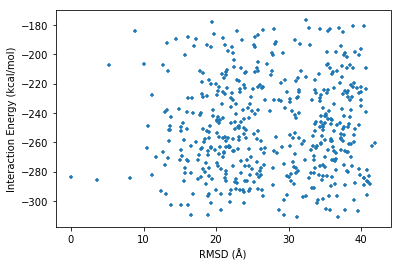

In [23]:
import netCDF4 as nc 
import matplotlib.pyplot as plt

lowest_energies = []
for energy, translation in trans_tuples:
    lowest_energies.append(energy)

# plot 1000 energies vs translations
fft_fn = '1EER_A:BC'
plt.scatter(rmsds, lowest_energies, s=20, marker='+')
plt.xlabel('RMSD (Å)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.savefig('%s.png'%fft_fn)
plt.show()

In [ ]:
import netCDF4 as nc
import numpy as np

grid_path = '/home/jim/Desktop/FFT_notebook/4.receptor_grid/1AVZ_B:C'
grid_nc = '%s/grid.nc'%grid_path


#parsing some of the netcdf variables from grid.nc
grid_variables = nc.Dataset(grid_nc, 'r').variables
counts = nc.Dataset(grid_nc, 'r').variables["counts"][:]
x = nc.Dataset(grid_nc, 'r').variables["x"][:]
y = nc.Dataset(grid_nc, 'r').variables["y"][:]
z = nc.Dataset(grid_nc, 'r').variables["z"][:]
electrostatic = nc.Dataset(grid_nc, 'r').variables["electrostatic"][:]
lja = nc.Dataset(grid_nc, 'r').variables["LJa"][:]
ljr = nc.Dataset(grid_nc, 'r').variables["LJr"][:]
occupancy = nc.Dataset(grid_nc, 'r').variables["occupancy"][:]
trans_crd = nc.Dataset(grid_nc, 'r').variables["trans_crd"][:]

#DELETE ME: print statements for inspecting the contents of grid.nc
#print(len(occupancy[200][:]))
#print(grid_variables)
kttc = []
for key in grid_variables:
    kttc.append(key)
#    print(grid_variables[key])
print(kttc)
print(counts)
#electrostatic grid is accessed by grid[x][y][z], to be confirmed. Alternative is grid[z][y][x]
#below code accesses electrostatic grid values for 3 points on the same axis
print(electrostatic[0][0][0],electrostatic[0][0][1],electrostatic[0][0][2])
#identifies occupied positions on the grid 
occupied_list = [i for i in range(len(occupancy[50][50])) if occupancy[50][50][i] == 1] 
          
# printing resultant list  
print ("New indices list : " + str(occupied_list)) 

#for i in res_list:
#    print(electrostatic[200][200][i])
    
#print(trans_crd)
#print(trans_crd[:])

def multiply_grids(electrostatic_grid, lja_grid, ljr_grid, occupancy_grid):
    grid_dot = np.empty((electrostatic_grid.shape[0], electrostatic_grid.shape[1], electrostatic_grid.shape[2]))
    for i in range(electrostatic_grid.shape[0]):
        for j in range(electrostatic_grid.shape[1]):
            for k in range(electrostatic_grid.shape[2]):
                grid_dot[i][j][k] = np.dot(electrostatic_grid[i][j][k], lja_grid[i][j][k])
                grid_dot[i][j][k] = np.dot(grid_dot[i][j][k], ljr_grid[i][j][k])
    return grid_dot

def get_meaningful_energies(energies):
    for i in range(energies.shape[0]):
        for j in range(energies.shape[1]):
            for k in range(energies.shape[2]):
                if energies[i][j][k] > 0.5:
                    print(energies[i][j][k])


#result = multiply_grids(electrostatic, lja, ljr, occupancy)
#get_meaningful_energies(result)
#print(result)
for i in trans_crd:
    if i[0] > 140:
        print(i)
    
native_trans = [i for i in range(len(trans_crd[:])) if trans_crd[i][0] == 140] 
print(len(trans_crd))
for point in occupied_list:
    print(trans_crd[point])
# get the center of mass of the crystallographic pose, then, get the center of mass for every
# translation of the native rotation and measure the distance between the two points. Select
# the translation with the nearest center of mass as the "native/crystallographic pose"



In [ ]:
#get the lowest rmsd poses compared to the crystal pose IN PROGRESS, DOES NOT WORK YET

from os import listdir
from os.path import isfile, join, isdir
import os
import netCDF4 as nc
import numpy as np
import IO
import prody
import netCDF4 as nc 
import matplotlib.pyplot as plt

base_path = "/home/jim/Desktop/FFT_notebook/"
fft_path = base_path + "5.fft_sampling/"
amber_path = base_path + "1.amber/"
analysis_path = base_path + "7.analysis/"

#print([name for name in os.listdir("/home/jim/Desktop/FFT_notebook/5.fft_sampling") if os.path.isdir(name)])

fft_paths = [f for f in listdir(fft_path) if os.path.isdir(join(fft_path, f))]

print(fft_paths)
for path in fft_paths:
    fft_nc = fft_path + path + '/fft_sample.nc'
    print(fft_nc)
    lig_prmtop = amber_path + "%s/ligand.prmtop"%path
    resampled_energies = nc.Dataset(fft_nc, 'r').variables["resampled_energies"][:]
    print('resampled_energies shape:', resampled_energies.shape)
    resampled_trans_vectors = nc.Dataset(fft_nc, 'r').variables["resampled_trans_vectors"][:]
    print('resampled_trans_vectors shape:', resampled_trans_vectors.shape)
    lig_positions = nc.Dataset(fft_nc, 'r').variables["lig_positions"][:]
    print('lig_positions shape:', lig_positions.shape)
    
    trans_tuples = []
#     for i, rotation in enumerate(resampled_energies):
#         min_index = np.where(rotation == rotation.min())
#         trans_tuples.append((rotation[min_index], resampled_trans_vectors[i][min_index]))

    for i, rotation in enumerate(lig_positions):
        print("rotation min:", rotation.min())
        min_index = np.where(rotation == rotation.min())
        trans_tuples.append((rotation[min_index]))
#         trans_tuples.append((rotation[min_index], resampled_trans_vectors[i][min_index]))

    if not os.path.exists(analysis_path + '%s/'%path):
        os.mkdir(analysis_path + '%s'%path)
    
    trans_lig_crd = []
    
    for i, position in enumerate(lig_positions):
        shifted_crds = []
        for j, crd in enumerate(position):
            shifted_crds.append([crd[0]+(trans_tuples[i][1][0][0]*.5), crd[1]+(trans_tuples[i][1][0][1]*.5),crd[2]+(trans_tuples[i][1][0][2]*.5)])
        shifted_array = np.array(shifted_crds)
        if not os.path.exists(analysis_path + '%s/lowest_energy_pose%s.pdb'%(path,i)):
            IO.write_pdb(lig_prmtop, shifted_array, analysis_path + '%s/lowest_energy_pose%s.pdb'%(path,i), "w")
    
    #read in the newly created pdb files for analysis TODO: make a trajectory
    pose_path = analysis_path + '%s/'%path
    pose_files = [f for f in listdir(pose_path) if isfile(join(pose_path, f))]

    pdb_paths = []

    for file in pose_files:
        if file[-4:] == '.pdb':
            path_temp = '%s%s'%(pose_path,file)
            pdb_paths.append(path_temp)

    native = prody.parsePDB(analysis_path + path + '/lowest_energy_pose0.pdb')
    rmsds = []
    for index, p in enumerate(pdb_paths):
        pose = prody.parsePDB(p)
        rmsds.append(prody.calcRMSD(native, pose))
        
    #finally make a new list of the interaction energies and make some graphs
    lowest_energies = []
    for energy, translation in trans_tuples:
        lowest_energies.append(energy)

    # plot 1000 energies vs translations
    plt.scatter(rmsds, lowest_energies, s=20, marker='+')
    plt.xlabel('RMSD (Å)')
    plt.ylabel('Interaction Energy (kcal/mol)')
    plt.savefig(analysis_path + '%s.png'%path)
    plt.show()

In [36]:
print(analysis_path + '%s.png'%path)
print(analysis_path)

/home/jim/Desktop/FFT_notebook/7.analysis//home/jim/Desktop/FFT_notebook/7.analysis/1EER_A:BC/lowest_energy_pose260.pdb.png
/home/jim/Desktop/FFT_notebook/7.analysis/


In [ ]:
# get all translations less than 10% higher than the interaction energy of the native pose
# example: if the native pose interaction energy is -10 kcal/mol, get all interaction energies less than
# -9 kcal/mol. This is pretty arbitrary, so it might be helpful to develop a theoretical basis for the cutoff.

from os import listdir
from os.path import isfile, join, isdir, exists
import netCDF4 as nc
import numpy as np
import IO
import prody
import netCDF4 as nc 
import matplotlib.pyplot as plt

base_path = "/home/jim/Desktop/FFT_notebook/"
fft_path = base_path + "5.fft_sampling/"
amber_path = base_path + "1.amber/"
analysis_path = base_path + "7.analysis/"

#print([name for name in os.listdir("/home/jim/Desktop/FFT_notebook/5.fft_sampling") if os.path.isdir(name)])

fft_paths = [f for f in listdir(fft_path) if isdir(join(fft_path, f))]

print(fft_paths)
for path in fft_paths:
    fft_nc = fft_path + path + '/fft_sample.nc'
    print(fft_nc)
    lig_prmtop = amber_path + "%s/ligand.prmtop"%path
    resampled_energies = nc.Dataset(fft_nc, 'r').variables["resampled_energies"][:]
    resampled_trans_vectors = nc.Dataset(fft_nc, 'r').variables["resampled_trans_vectors"][:]
    lig_positions = nc.Dataset(fft_nc, 'r').variables["lig_positions"][:]
    
    trans_tuples = []
    native_energy = resampled_energies[0][0]
    for i, rotation in enumerate(resampled_energies):
        for j, pose in enumerate(rotation):
            if pose < (native_energy - (native_energy*0.01)):
                trans_tuples.append((pose, resampled_trans_vectors[i][j], i, j))

    if not exists(analysis_path + '%s/'%path):
        os.mkdir(analysis_path + '%s'%path)
    
    trans_lig_crd = []
    lowest_energies = []
    
    for number, (energy, translation, rot_index, pose_index) in enumerate(trans_tuples):
        shifted_crds = []
        origin_crd = lig_positions[rot_index]
        for i, crd in enumerate(origin_crd):
            shifted_crds.append([crd[0]+(translation[0]*.5), crd[1]+(translation[1]*.5),crd[2]+(translation[2]*.5)])
        shifted_array = np.array(shifted_crds)
        lowest_energies.append(energy)
        if not exists(analysis_path + '%s/lowest_energy_poses_test%s.pdb'%(path,number)):
            #print(rot_index, pose_index, energy)
            IO.write_pdb(lig_prmtop, shifted_array, analysis_path + '%s/lowest_energy_pose_test%s.pdb'%(path,number), "w")
    
    #read in the newly created pdb files for analysis TODO: make a trajectory you lazy bastard
    pose_path = analysis_path + '%s/'%path
    pose_files = [f for f in listdir(pose_path) if isfile(join(pose_path, f))]

    pdb_paths = []

    for file in pose_files:
        if file[-4:] == '.pdb':
            path_temp = '%s%s'%(pose_path,file)
            pdb_paths.append(path_temp)
    print(len(pdb_paths))
    native = prody.parsePDB(analysis_path + path + '/lowest_energy_pose_test0.pdb')
    rmsds = []
    for index, p in enumerate(pdb_paths):
        pose = prody.parsePDB(p)
        rmsds.append(prody.calcRMSD(native, pose))

        

    # plot 1000 energies vs translations
    print(len(lowest_energies))
    print(len(rmsds))
    plt.scatter(rmsds, lowest_energies, s=20, marker='+')
    plt.xlabel('RMSD (Å)')
    plt.ylabel('Interaction Energy (kcal/mol)')
    plt.savefig(analysis_path + '%s/RMSDvsIE.png'%path)
    plt.show()

In [35]:
# this is test code for calculating an RMSD between two structures using ProDy

ref = prody.parsePDB('/home/jim/Desktop/FFT_notebook/7.analysis/1EER_A:BC/lowest_energy_pose_test0.pdb')
tar = prody.parsePDB('/home/jim/Desktop/FFT_notebook/7.analysis/1EER_A:BC/lowest_energy_pose_test1.pdb')
print(prody.calcRMSD(ref.getCoords(), tar.getCoords()))

print(ref.getCoords())

@> 2635 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 2635 atoms and 1 coordinate set(s) were parsed in 0.01s.


14.766356383714092


In [38]:
# this is test code for calculating an RMSD between two structures using MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis import align, rms

ref = mda.Universe('/home/jim/Desktop/FFT_notebook/7.analysis/1EER_A:BC/lowest_energy_pose_test0.pdb')
mobile = mda.Universe('/home/jim/Desktop/FFT_notebook/7.analysis/1EER_A:BC/lowest_energy_pose_test1.pdb')

ref_sel = ref.select_atoms("protein")
mobile_sel = mobile.select_atoms("protein")

rms.rmsd(ref_sel.positions, mobile_sel.positions)

/home/jim/anaconda3/envs/fftanalysis/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


14.766356363469633